# Electric Vehicle Population

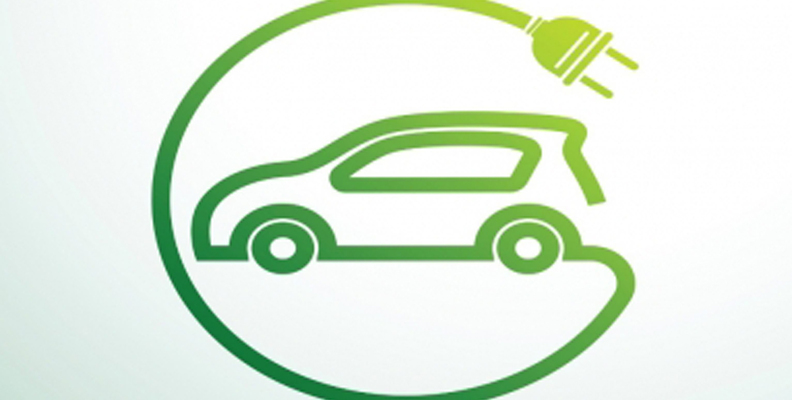

About Dataset
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

<body>
    <div class="toc">
       <H2 span="color:white"> Starter EDA for my New Dataset</H2>
</body>

In [3]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.6 MB/s eta 0:00:00


In [4]:
# 데이터분석 세트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ps
import seaborn as sns


from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

plt.style.use('ggplot')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<body>
    <div class="toc">
       <H2 span="color:white"> Importing Data  </H2>
</body>

In [8]:
# 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/전기차_인구/"    

df = pd.read_csv(base_path + "Electric_Vehicle_Population.csv", encoding="utf-8" )


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4736 sha256=ec48ad524ed3e69f3e01b199f6054d399f7ac5b2da0c486d119439ba84d8013c
  Stored in directory: /root/.cache/pip/wheels/93/57/7e/fdc4b9923cf3f1f46de4e2ea7a5a4acb335357f919920ffb7c
Successfully built fasteda
DataFrame Head:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,lat,lon,geometry
0,3MW5P9J05N,Arapahoe,Englewood,CO,80111.0,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,200589147,POINT (-104.89239 39.61914),NaN,8.005007e+09,-104.892390,39.61914,POINT (-104.89239 39.61914)
1,5YJXCBE27J,Island,Greenbank,WA,98253.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,10.0,326880081,POINT (-122.575569 48.08489),NaN,5.302997e+10,-122.575569,48.08489,POINT (-122.57557 48.08489)
2,1N4AZ0CP3F,Kings,Lemoore,CA,93245.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,NaN,182237457,POINT (-119.78637 36.30101),NaN,6.031980e+09,-119.786370,36.30101,POINT (-119.78637 36.30101)


DataFrame Tail:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,lat,lon,geometry
109478,5YJYGDEE9M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,153892070,POINT (-122.212105 47.792368),PUGET SOUND ENERGY INC,5.306105e+10,-122.212105,47.792368,POINT (-122.21210 47.79237)
109479,1N4AZ1CP0J,King,Shoreline,WA,98133.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,289064191,POINT (-122.343983 47.739969),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,-122.343983,47.739969,POINT (-122.34398 47.73997)
109480,5YJYGDEE2M,Benton,Richland,WA,99354.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8.0,171199227,POINT (-119.26844 46.31484),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10,-119.268440,46.314840,POINT (-119.26844 46.31484)


----------------------------------------------------------------------------------------------------
Missing values:


,0
County,1
City,1
Postal Code,1
Model,7
Legislative District,276
Vehicle Location,25
Electric Utility,428
2020 Census Tract,1
lat,25
lon,25


----------------------------------------------------------------------------------------------------
MSNO Matrix:



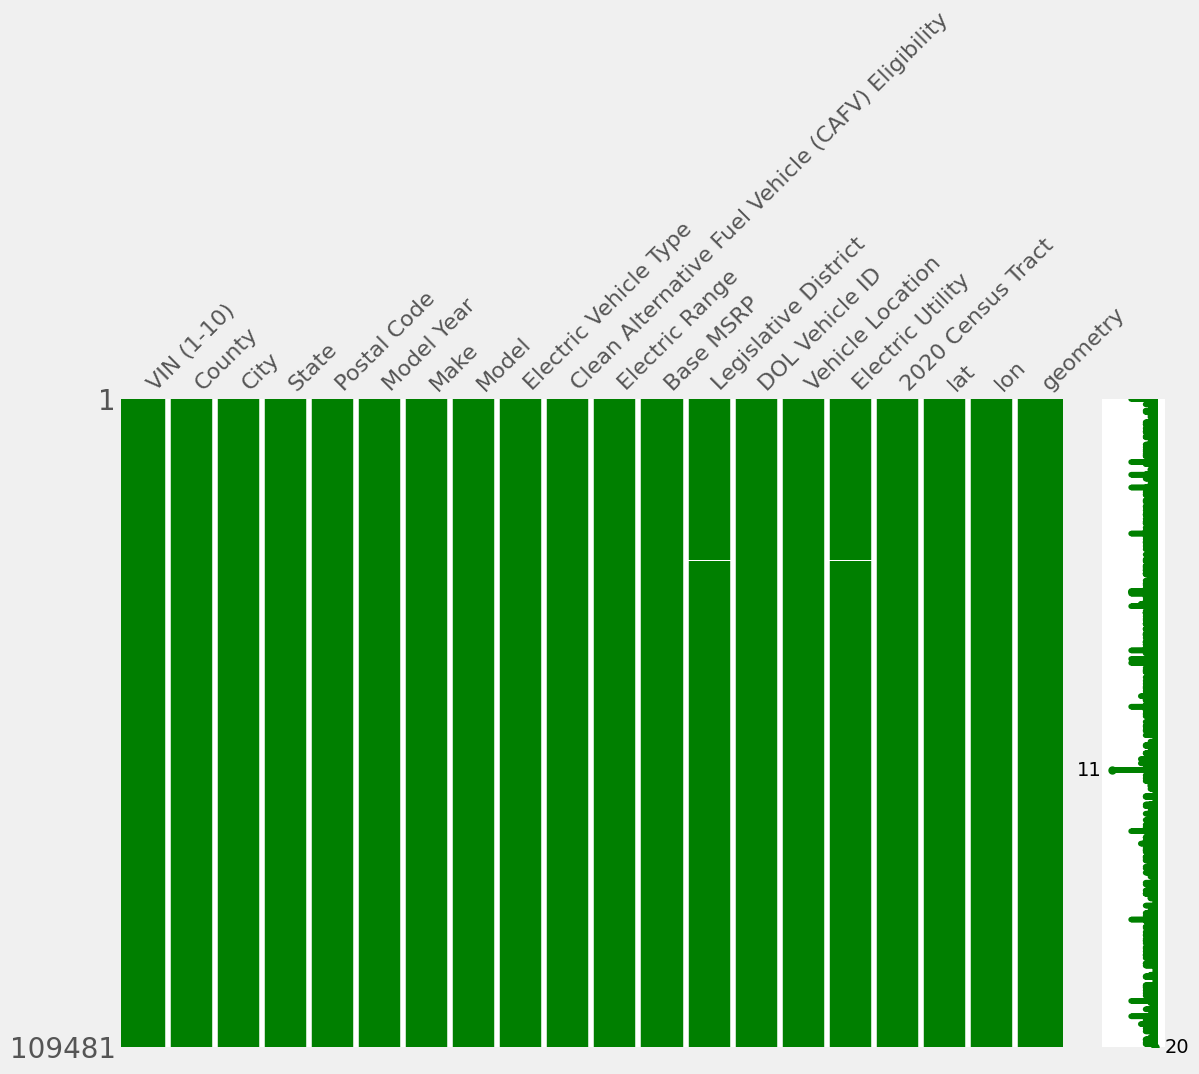

----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(109481, 20)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 20 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         109481 non-null  object  
 1   County                                             109480 non-null  object  
 2   City                                               109480 non-null  object  
 3   State                                              109481 non-null  object  
 4   Postal Code                                        109480 non-null  float64 
 5   Model Year                                         10948

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Postal Code,109480,98157.013,98121,2640.606,1730,98052,98121,98370,99701,1.824704,3.109144
Model Year,109481,2018.899,2019,2.873,1997,2017,2019,2021,2023,-0.809604,0.004465
Electric Range,109481,90.211,35,102.576,0,0,35,208,337,0.777115,-0.938424
Base MSRP,109481,1849.195,0,10946.085,0,0,0,0,845000,9.942391,360.612892
Legislative District,109205,29.824,34,14.68,1,18,34,43,49,-0.545376,-0.975343
DOL Vehicle ID,109481,198447551.86,187411808,95617186.542,4777,146731322,187411808,216917571,479254772,1.149127,2.330549
2020 Census Tract,109480,52968493402.103,53033029304,1675103687.86,1101001400,53033008500,53033029304,53053072506,56033000100,0.308124,-0.389743
lat,109456,-121.271,-122.289,13.503,-158.082,-122.408,-122.289,-122.132,114.325,17.369402,301.500757
lon,109456,47.306,47.615,2.594,4.178,47.363,47.615,47.722,67.019,-15.919703,267.544723


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



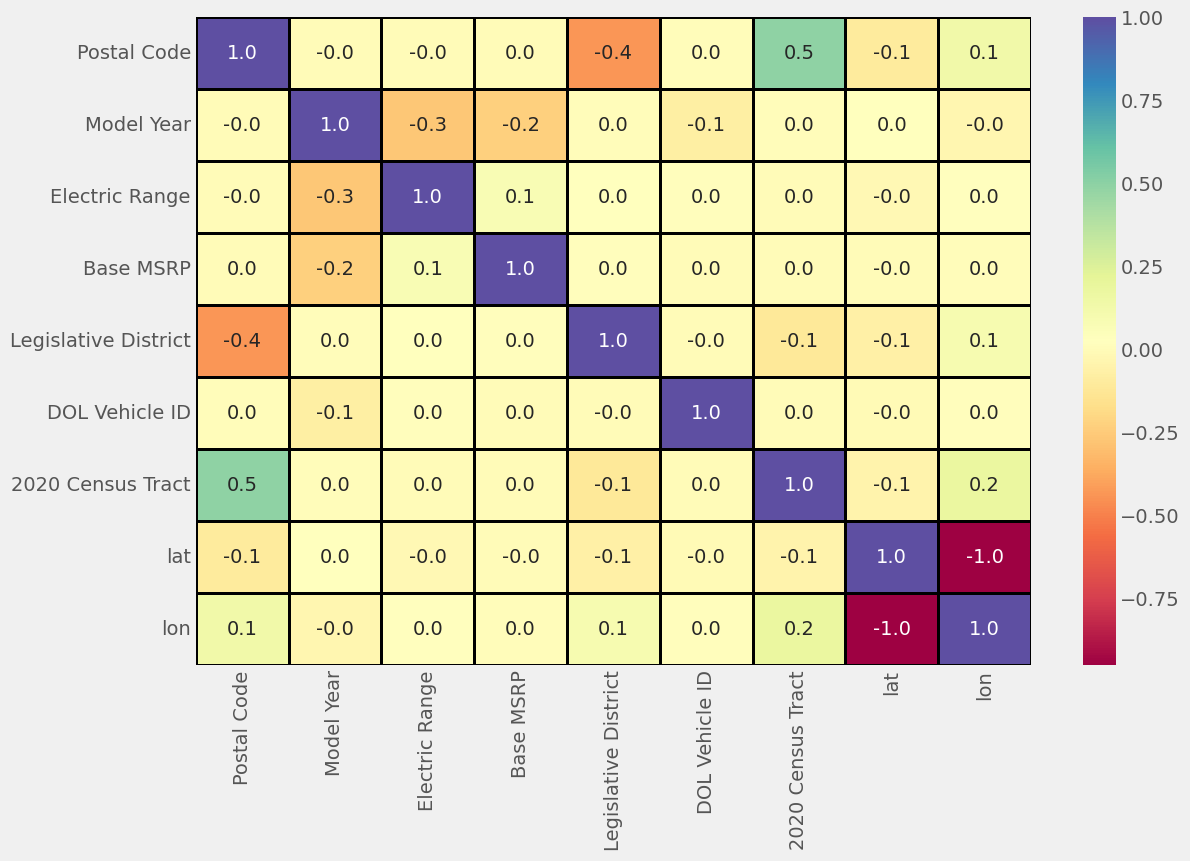

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



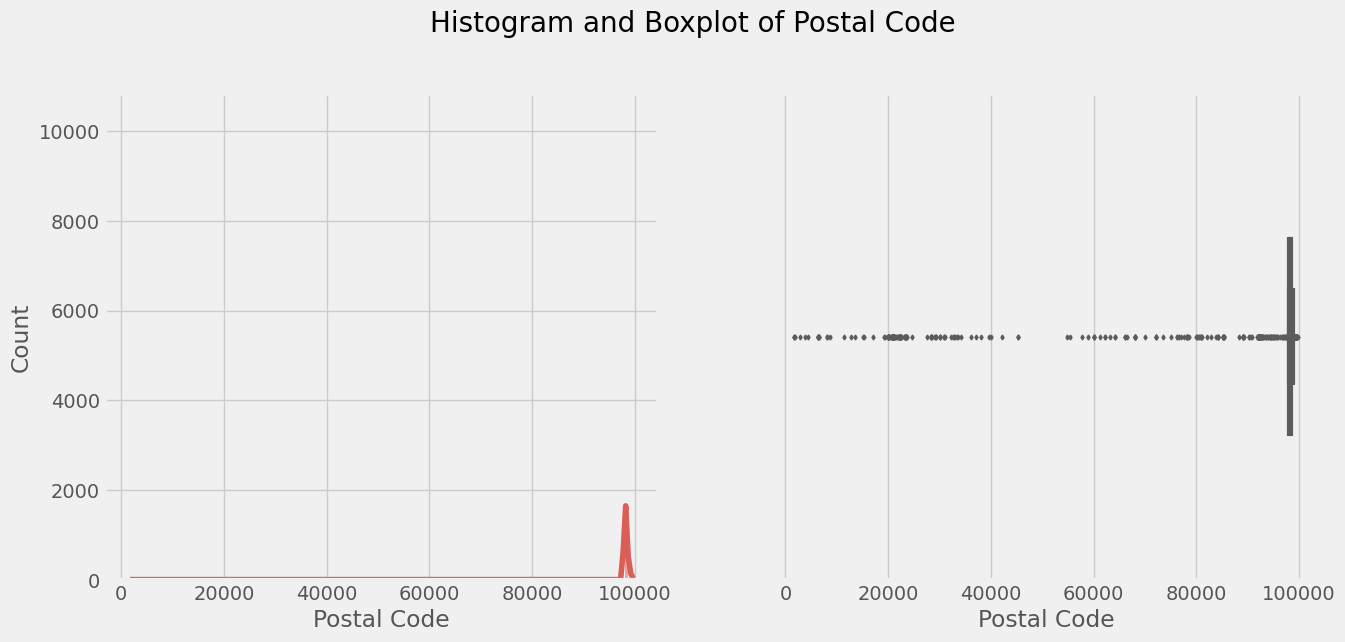

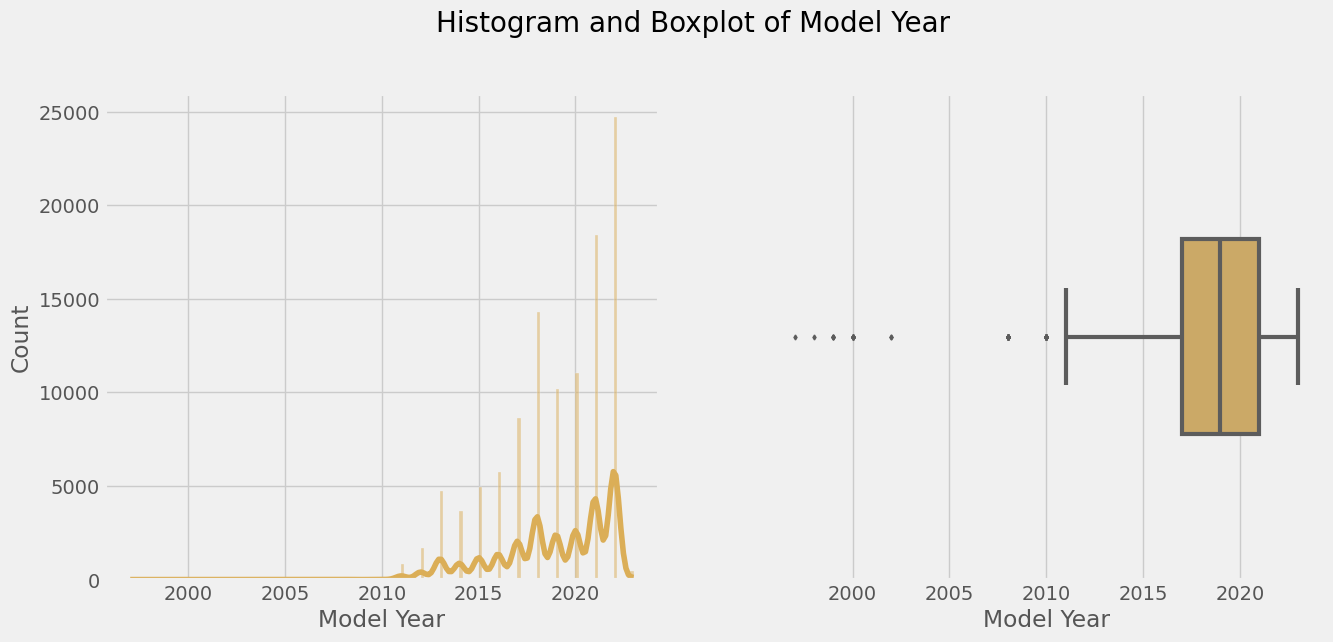

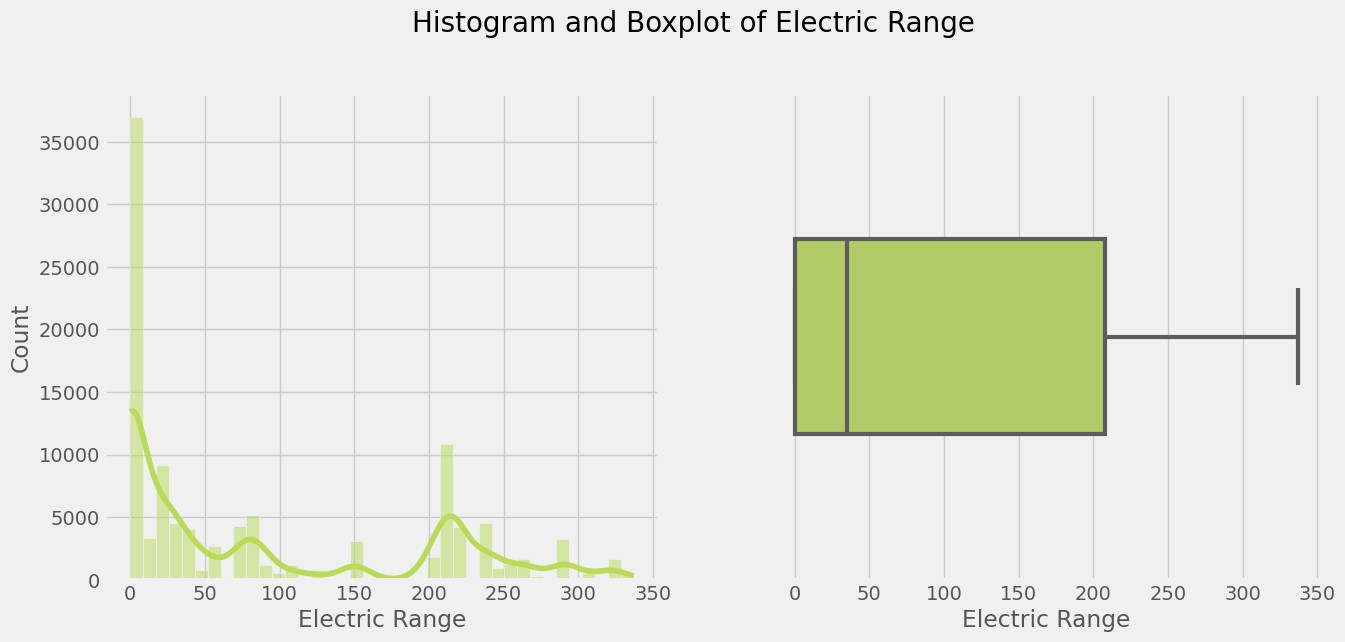

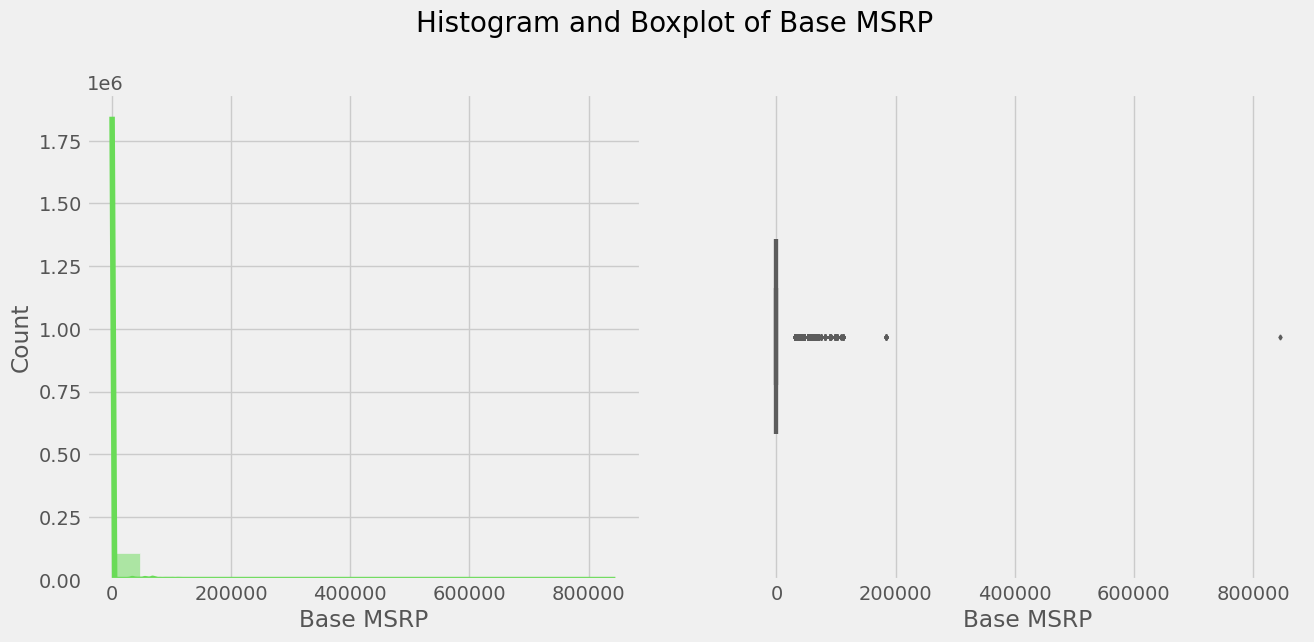

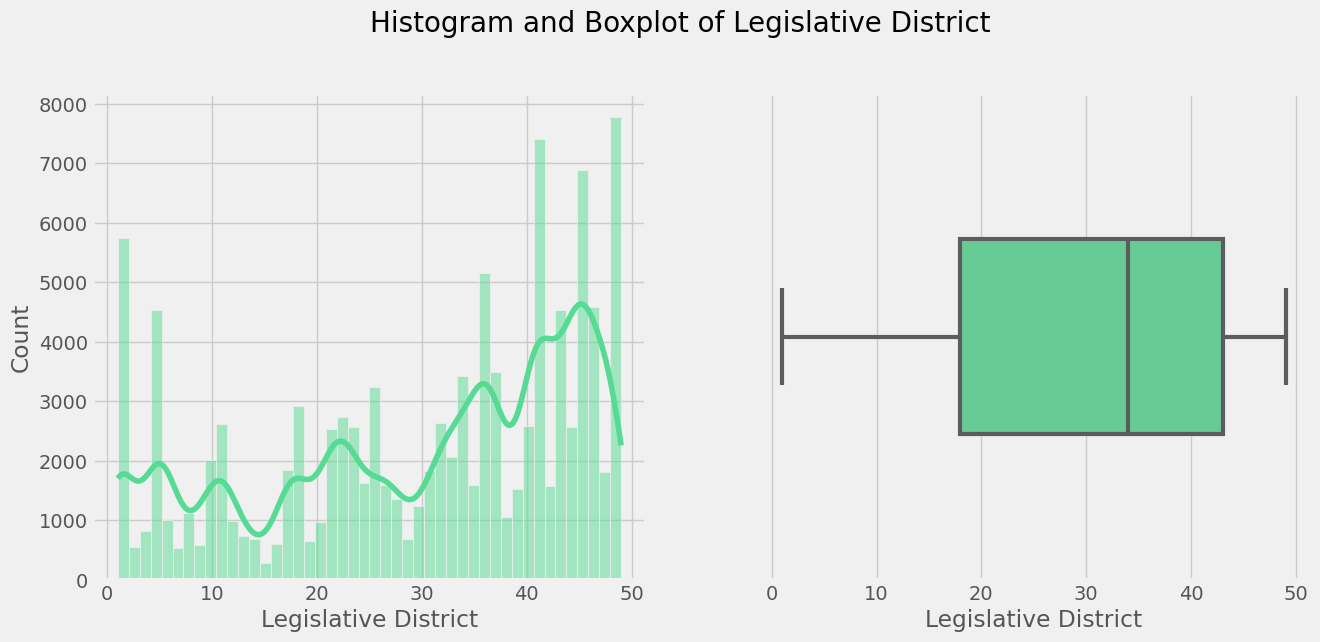

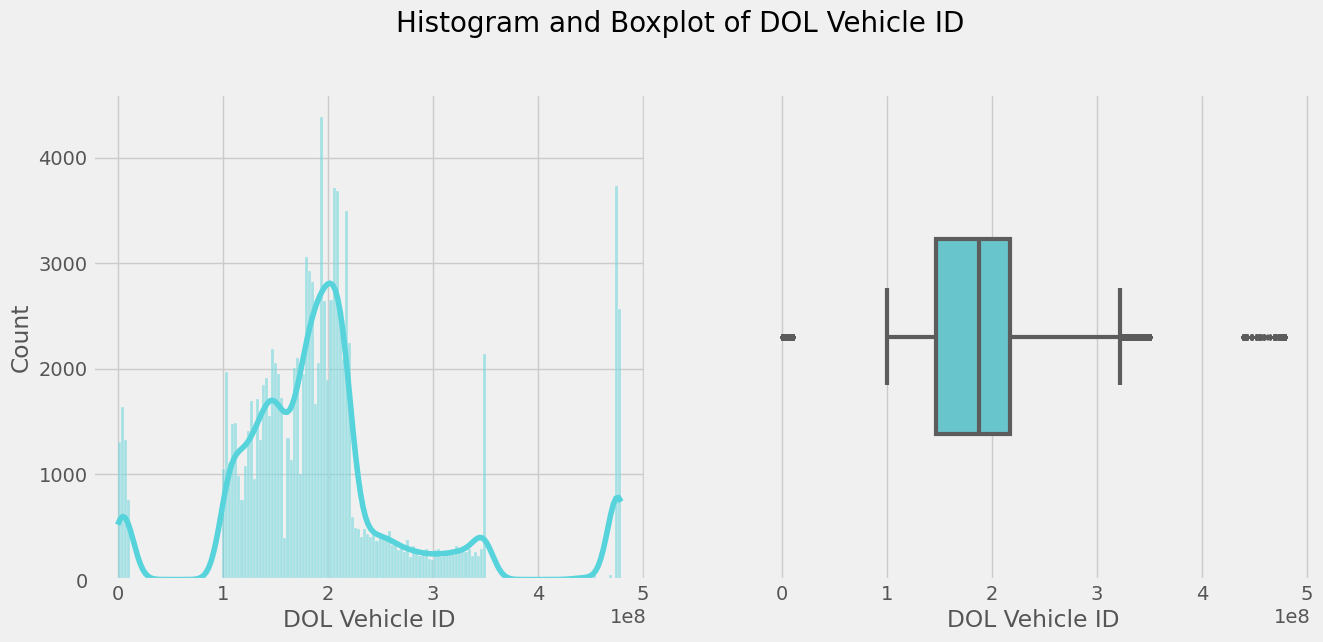

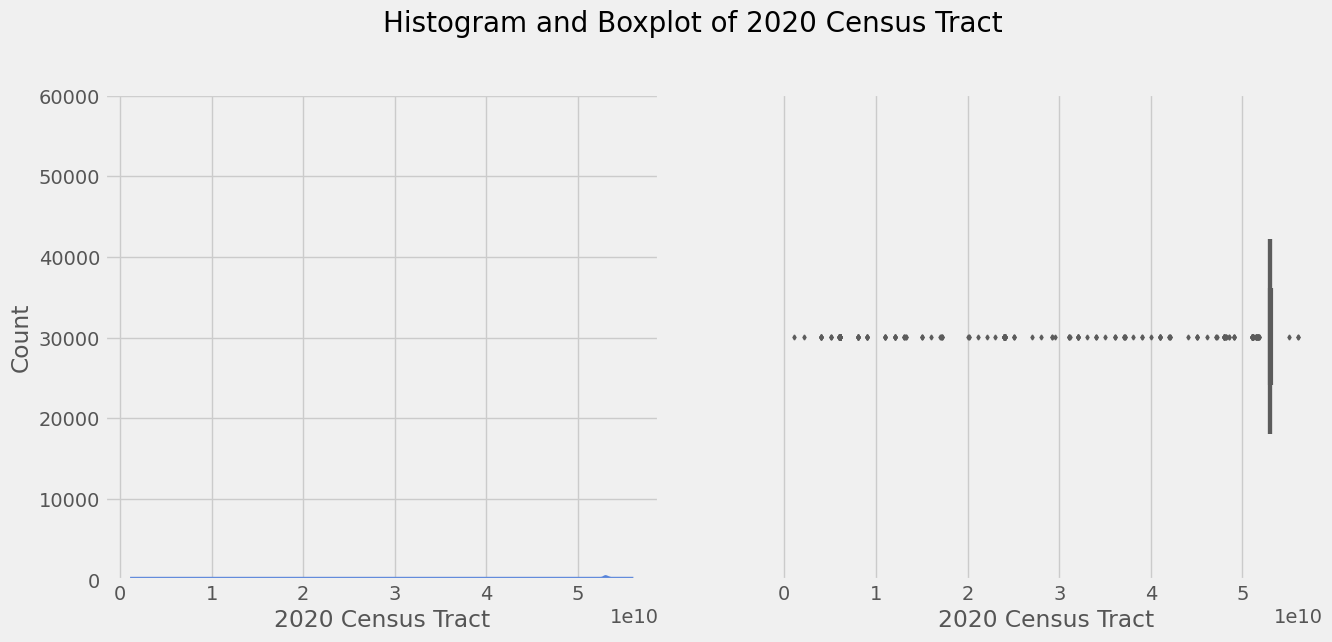

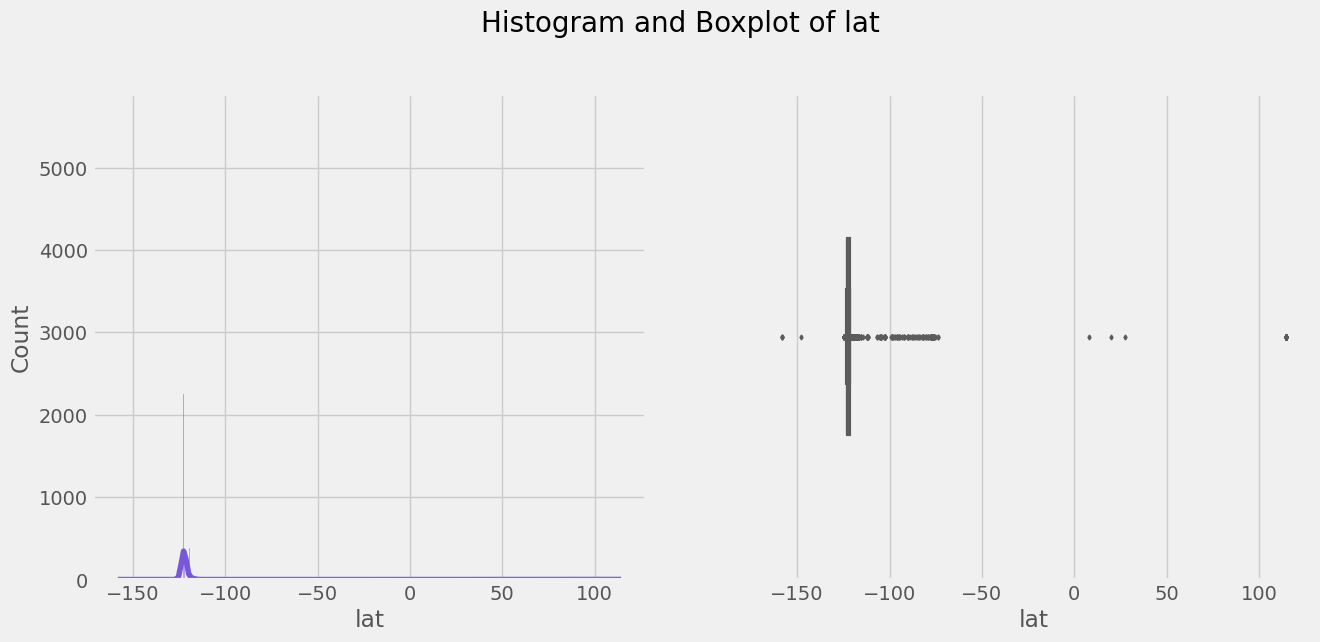

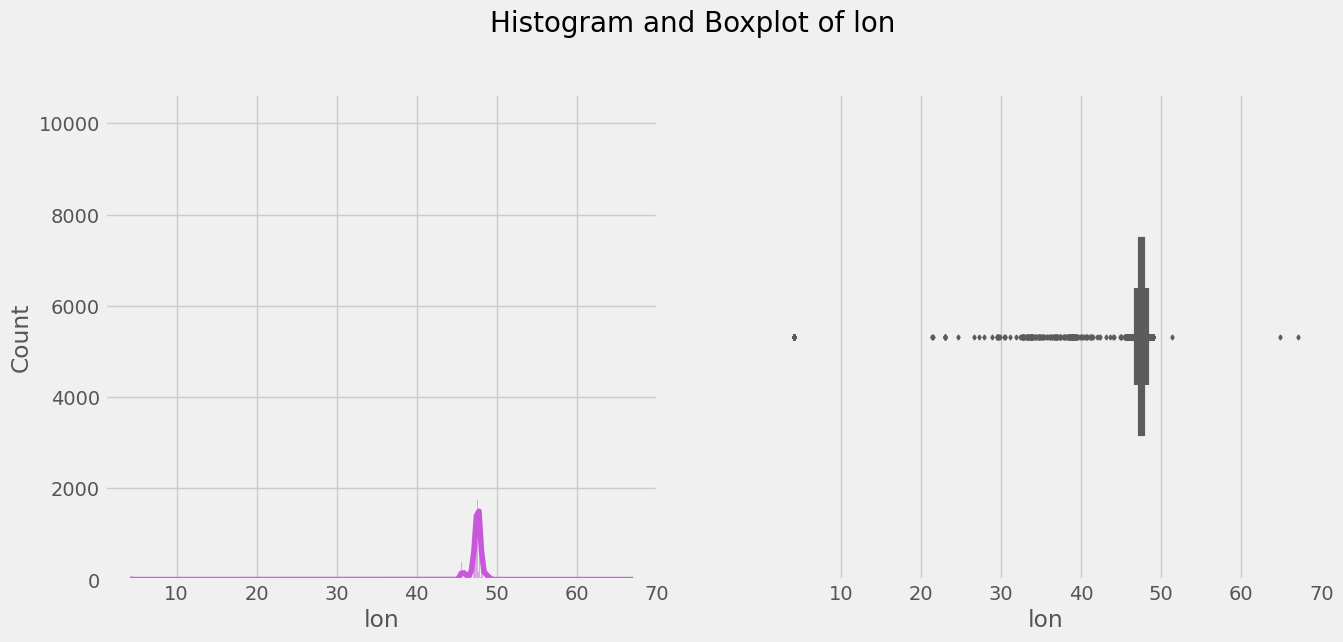

TypeError: ignored

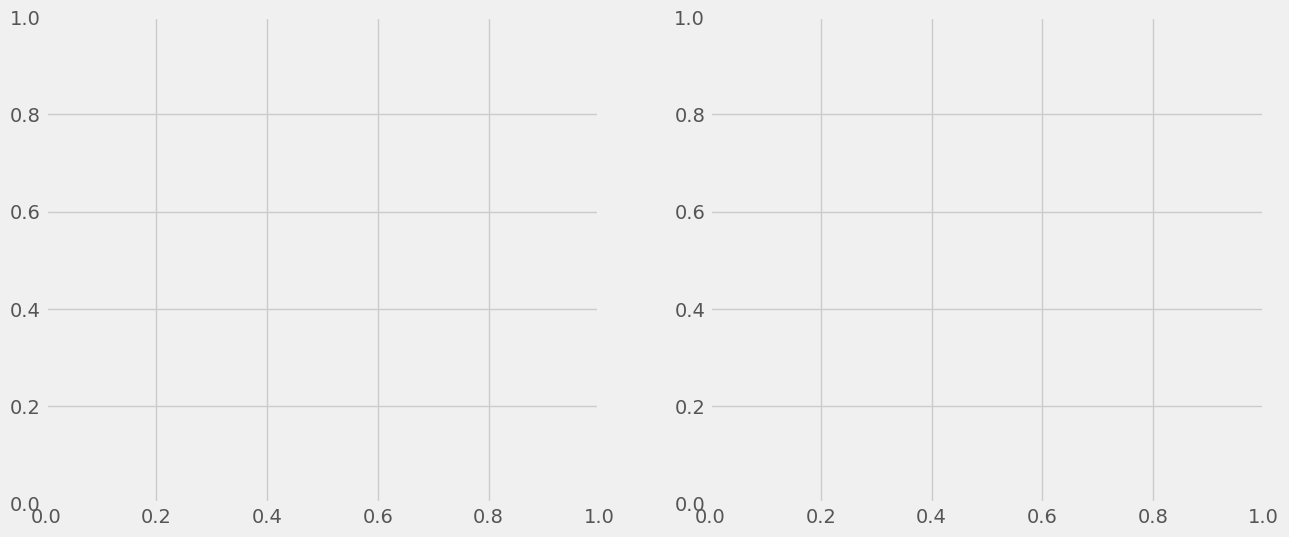

In [15]:
!pip install fasteda
from fasteda import fast_eda
fast_eda(df)

<body>
    <div class="toc">
       <H2 span="color:white"> Top 5 vs Bottom 5 Comparison   </H2>
</body>

Text(0.5, 1.0, 'Bottom 5 Cars')

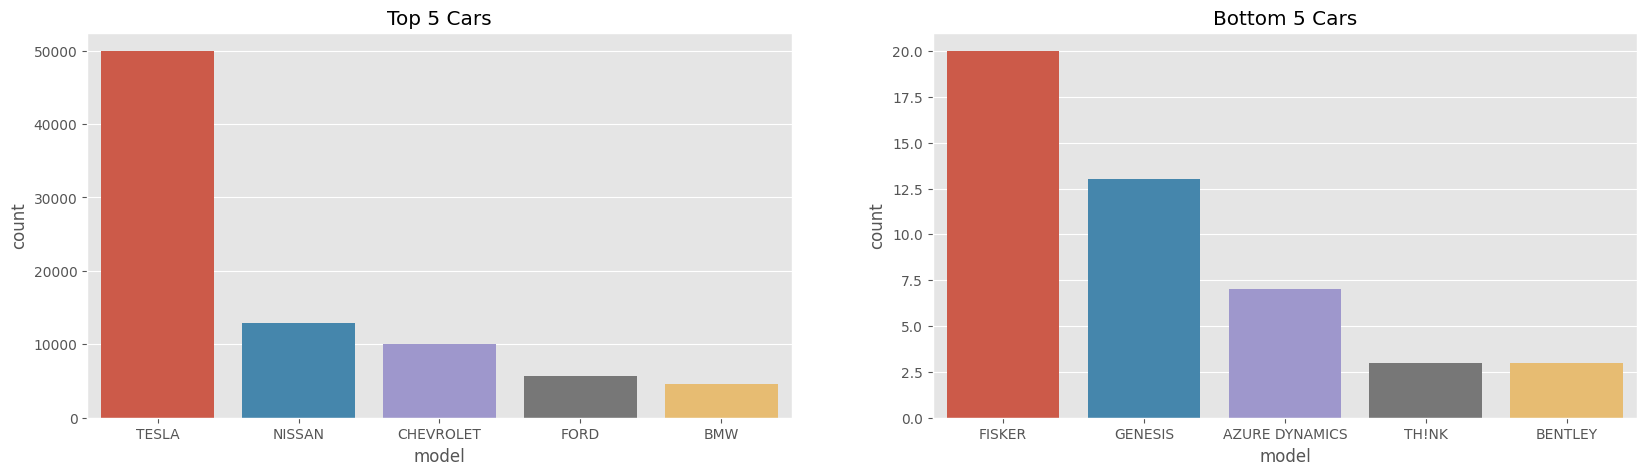

In [9]:
car_market_share = pd.DataFrame(df.groupby('Make')['VIN (1-10)'].count().reset_index()).sort_values(by='VIN (1-10)',ascending=False).reset_index(drop=True)
car_market_share.columns = ['model','count']
car_market_share_top_5 = car_market_share.head(5)
car_market_share_bottom_5 = car_market_share.tail(5)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(data=car_market_share_top_5, x="model", y="count",ax=axes[0])
sns.barplot(data=car_market_share_bottom_5, x="model", y="count",ax=axes[1])
axes[0].set_title('Top 5 Cars')
axes[1].set_title('Bottom 5 Cars')

<body>
    <div class="toc">
       <H2 span="color:white">Distance Travel by veichel per electric charge </H2>
</body>

In [10]:
km_range = pd.DataFrame(df.groupby('Make')['Electric Range'].mean().reset_index()).sort_values(by='Electric Range',ascending=False).reset_index(drop=True).head(10)
km_range.columns = ['model','km_range']
ps.pie(data_frame=km_range, names='model', values='km_range', hover_name='km_range',title='Top 10 Model with KM range',hole=True)

<body>
    <div class="toc">
       <H2 span="color:white">Year Wise Cars </H2>
</body>

In [11]:
# Year Wise Cars
year_wise_cars = df.groupby('Model Year')['VIN (1-10)'].count().reset_index()
year_wise_cars.columns = ['year','num_cars']

fig = ps.line(year_wise_cars,x="year", y="num_cars", title='Year Wise Number of Cars',markers=True)
fig.show()

<body>
    <div class="toc">
       <H2 span="color:white">Plotting the lat and lon </H2>
</body>

In [12]:
df['lat'] = df['Vehicle Location'].str.split(' ').str[1].str.split('(').str[1].astype(float)
df['lon'] = df['Vehicle Location'].str.split(' ').str[2].str.split(')').str[0].astype(float)

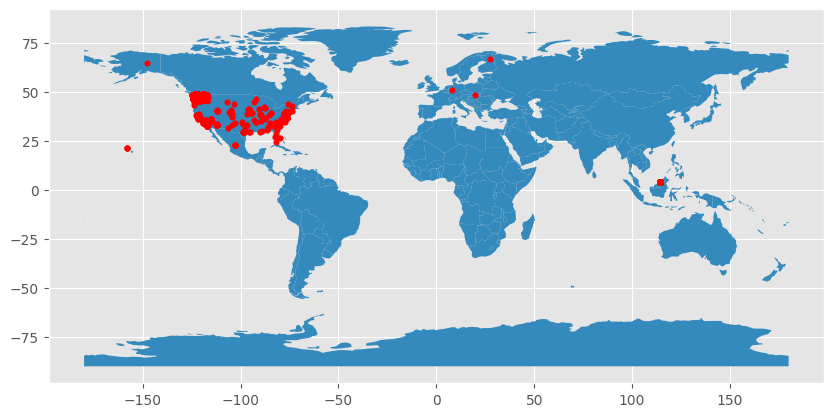

In [13]:
geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

<body>
    <div class="toc">
       <H2 span="color:white">Eligibility Details</H2>
</body>

In [14]:
eligibility_criteria = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().reset_index()
eligibility_criteria.columns = ['criteria','occurrence']
eligibility_criteria.style.background_gradient()

,criteria,occurrence
0,Clean Alternative Fuel Vehicle Eligible,58618
1,Eligibility unknown as battery range has not been researched,36044
2,Not eligible due to low battery range,14819
